# Bay Area Bike Share Analysis

## Data Wrangling

In [1]:
# imports and display set-up
import pandas as pd
import csv
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
from IPython.display import display
%matplotlib inline

# version of package
print("Using pandas:", pd.__version__)
print("Using csv:", csv.__version__)
print("Using matplotlib:", matplotlib.__version__)


Using pandas: 0.24.2
Using csv: 1.0
Using matplotlib: 3.0.3


In [2]:
# quick look at the datasets
trip_df = pd.read_csv('../01_Data/01_Raw_Data/201402_trip_data.csv', nrows=10)
print('trip_data:')
display(trip_df.head())

print('\n', 'station_data:')
station_df = pd.read_csv('../01_Data/01_Raw_Data/201402_station_data.csv', nrows=10)
display(station_df.head())

print('\n', 'weather_data:')
weather_df = pd.read_csv('../01_Data/01_Raw_Data/201402_weather_data.csv', nrows=10)
display(weather_df.head())

trip_data:


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103



 station_data:


,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013



 weather_data:


,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30,0,6,NaN,277,94107


In [3]:
# reducing the amount of data for cleaning and exploration

# file locations
file_in  = '../01_Data/01_Raw_Data/201402_trip_data.csv'
file_out = '../01_Data/02_Intermidiate/201309_trip_data.csv'

with open(file_out, 'w') as f_out, open(file_in, 'r') as f_in:
    # set up csv reader and writer objects
    in_reader = csv.reader(f_in)
    out_writer = csv.writer(f_out)

    # write rows from in-file to out-file until specified date reached
    while True:
        datarow = next(in_reader)
        # trip start dates in 3rd column, m/d/yyyy HH:MM formats
        if datarow[2][:9] == '10/1/2013':
            break
        out_writer.writerow(datarow)

In [4]:
# Load in the data file and print out the first few rows and the description of the df
sample_data = pd.read_csv('../01_Data/02_Intermidiate/201309_trip_data.csv')
display(sample_data.describe())
sample_data.head()

,Trip ID,Duration,Start Terminal,End Terminal,Bike #
count,27345.000000,27345.000000,27345.000000,27345.000000,27345.000000
mean,22940.489230,1655.773048,56.236862,56.286195,438.266776
std,10476.693107,7734.468455,17.584462,17.521357,143.572212
min,4069.000000,60.000000,2.000000,2.000000,9.000000
25%,14001.000000,409.000000,49.000000,49.000000,348.000000
50%,23004.000000,643.000000,60.000000,60.000000,452.000000
75%,32088.000000,1037.000000,70.000000,70.000000,554.000000
max,40937.000000,597517.000000,77.000000,77.000000,714.000000


,Trip ID,Duration,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,Zip Code
0,4576,63,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,94127
1,4607,70,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,95138
2,4130,71,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,97214
3,4251,77,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,95060
4,4299,83,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,94103


In [5]:
# Display the first few rows of the station data file.
station_info = pd.read_csv('../01_Data/01_Raw_Data/201402_station_data.csv')
display(station_info.head())

# This function will be called by another function later on to create the mapping.
def create_station_mapping(station_data):
    """
    Create a mapping from station IDs to cities, returning the
    result as a dictionary.
    """
    station_map = {}
    for data_file in station_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header row for each row's
            # dictionary keys
            station_reader = csv.DictReader(f_in)

            for row in station_reader:
                station_map[row['station_id']] = row['landmark'], row['lat'], row['long']

    return station_map

,station_id,name,lat,long,dockcount,landmark,installation
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,San Jose,8/6/2013
1,3,San Jose Civic Center,37.330698,-121.888979,15,San Jose,8/5/2013
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,San Jose,8/6/2013
3,5,Adobe on Almaden,37.331415,-121.893200,19,San Jose,8/5/2013
4,6,San Pedro Square,37.336721,-121.894074,15,San Jose,8/7/2013


In [6]:
# Display the first few rows of the weather data file.
weather_info = pd.read_csv('../01_Data/01_Raw_Data/201402_weather_data.csv')
display(weather_info.head())

# This function will be called by another function later on to create the mapping.
def create_weather_mapping(weather_data):
    """
    Create a mapping from date and city to weather, returning the
    result as a dictionary.
    """
    # Mapping used to convert zip codes into cities
    zip_map = {'94107': 'San Francisco',
               '94063': 'Redwood City',
               '94301': 'Palo Alto', 
               '94041': 'Mountain View', 
               '95113': 'San Jose'}
    
    
    weather_map = {}
    for data_file in weather_data:
        with open(data_file, 'r') as f_in:
            # set up csv reader object - note that we are using DictReader, which
            # takes the first row of the file as a header row for each row's
            # dictionary keys
            weather_reader = csv.DictReader(f_in)
            
            # cleaning some headers
            for row in weather_reader:
                if 'PDT' in row:
                    row['PDT'] = row['PDT']
                else:
                    row['PDT'] = row['Date']
                
                if 'Zip' in row:
                    row['Zip'] = row['Zip']
                else:
                    row['Zip'] = row['zip']
                    
                if 'PrecipitationIn' in row:
                    row['PrecipitationIn'] = row['PrecipitationIn']
                else:
                    row['PrecipitationIn'] = row['Precipitation_In ']
                
                # assigning city to zip codes
                row['city'] = zip_map[row['Zip']]
                
                # the value T in precipitation is closed to 0
                if row['PrecipitationIn'] == 'T':
                    row['PrecipitationIn'] = 0
                else:
                    row['PrecipitationIn']
                
                weather_map.setdefault(row['PDT'], {})[row['city']] = row['PrecipitationIn']

    return weather_map

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Cloud_Cover,Events,Wind_Dir_Degrees,zip
0,8/29/2013,74,68,61,61,58,56,93,75,57,...,10,10,23,11,28.0,0,4,NaN,286,94107
1,8/30/2013,78,69,60,61,58,56,90,70,50,...,10,7,29,13,35.0,0,2,NaN,291,94107
2,8/31/2013,71,64,57,57,56,54,93,75,57,...,10,10,26,15,31.0,0,4,NaN,284,94107
3,9/1/2013,74,66,58,60,56,53,87,68,49,...,10,10,25,13,29.0,0,4,NaN,284,94107
4,9/2/2013,75,69,62,61,60,58,93,77,61,...,10,6,23,12,30.0,0,6,NaN,277,94107


In [7]:
def summarise_data(trip_in, station_data, weather_data, trip_out):
    """
    This function takes trip and station information and outputs a new
    data file with a condensed summary of major trip information. The
    trip_in and station_data arguments will be lists of data files for
    the trip and station information, respectively, while trip_out
    specifies the location to which the summarized data will be written.
    """
    # generate dictionary of station - city mapping
    station_map = create_station_mapping(station_data)
    
    weather_map = create_weather_mapping(weather_data)
    
    with open(trip_out, 'w') as f_out:
        # set up csv writer object        
        out_colnames = ['trip_id', 'duration', 'start_date', 'start_year',
                        'start_month', 'start_hour', 'weekday',
                        'start_terminal', 'lat', 'long', 'start_city', 
                        'zip', 'end_city', 'subscription_type', 'precipitation']        
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        for data_file in trip_in:
            with open(data_file, 'r') as f_in:
                # set up csv reader object
                trip_reader = csv.DictReader(f_in)

                # collect data from and process each row
                for row in trip_reader:
                    new_point = {}
                    
                    # convert duration units from seconds to minutes
                    new_point['duration'] = float(row['Duration'])/60
                    
                    # reformat datestrings into multiple columns
                    trip_date = datetime.strptime(row['Start Date'], '%m/%d/%Y %H:%M')
                    new_point['start_date']  = trip_date.strftime('%m-%d-%Y')
                    new_point['start_year']  = trip_date.strftime('%Y')
                    new_point['start_month'] = trip_date.strftime('%m')
                    new_point['start_hour']  = trip_date.strftime('%H')
                    new_point['weekday']     = trip_date.strftime('%A')
                    
                    # remap start and end terminal with start and end city
                    new_point['start_terminal'] = row['Start Station']
                    new_point['start_city'] = station_map[row['Start Terminal']][0]
                    new_point['lat'] = station_map[row['Start Terminal']][1]
                    new_point['long'] = station_map[row['Start Terminal']][2]
                    new_point['end_city'] = station_map[row['End Terminal']][0]
                    new_point['zip'] = row['Zip Code']
                    
                    # adding precipitations
                    new_point['precipitation'] = weather_map[row['Start Date'].split()[0]][station_map[row['Start Terminal']][0]]
                    
                    # adding trip_id
                    new_point['trip_id'] = row['Trip ID']

                    # two different column names for subscribers depending on file
                    if 'Subscription Type' in row:
                        new_point['subscription_type'] = row['Subscription Type']
                    else:
                        new_point['subscription_type'] = row['Subscriber Type']

                    # write the processed information to the output file.
                    trip_writer.writerow(new_point)

In [8]:
# Process the data by running the function we wrote above.
station_data = ['../01_Data/01_Raw_Data/201402_station_data.csv']
trip_in = ['../01_Data/02_Intermidiate/201309_trip_data.csv']
weather_data = ['../01_Data/01_Raw_Data/201402_weather_data.csv']
trip_out = '../01_Data/02_Intermidiate/201309_trip_summary.csv'
summarise_data(trip_in, station_data, weather_data, trip_out)

# Load in the data file and print out the first few rows
sample_data = pd.read_csv(trip_out)
display(sample_data.describe())
display(sample_data.head())


,trip_id,duration,start_year,start_month,start_hour,lat,long,precipitation
count,27345.000000,27345.000000,27345.0,27345.000000,27345.000000,27345.000000,27345.000000,27345.000000
mean,22940.489230,27.596217,2013.0,8.923130,13.728396,37.744377,-122.356932,0.004915
std,10476.693107,128.907808,0.0,0.266389,4.333934,0.129090,0.134777,0.051906
min,4069.000000,1.000000,2013.0,8.000000,0.000000,37.329732,-122.418954,0.000000
25%,14001.000000,6.816667,2013.0,9.000000,10.000000,37.776619,-122.403452,0.000000
50%,23004.000000,10.716667,2013.0,9.000000,14.000000,37.786978,-122.398436,0.000000
75%,32088.000000,17.283333,2013.0,9.000000,17.000000,37.794139,-122.394203,0.000000
max,40937.000000,9958.616667,2013.0,9.000000,23.000000,37.804770,-121.877349,1.710000


,trip_id,duration,start_date,start_year,start_month,start_hour,weekday,start_terminal,lat,long,start_city,zip,end_city,subscription_type,precipitation
0,4576,1.050000,08-29-2013,2013,8,14,Thursday,South Van Ness at Market,37.774814,-122.418954,San Francisco,94127,San Francisco,Subscriber,0.0
1,4607,1.166667,08-29-2013,2013,8,14,Thursday,San Jose City Hall,37.337391,-121.886995,San Jose,95138,San Jose,Subscriber,0.0
2,4130,1.183333,08-29-2013,2013,8,10,Thursday,Mountain View City Hall,37.389218,-122.081896,Mountain View,97214,Mountain View,Subscriber,0.0
3,4251,1.283333,08-29-2013,2013,8,11,Thursday,San Jose City Hall,37.337391,-121.886995,San Jose,95060,San Jose,Subscriber,0.0
4,4299,1.383333,08-29-2013,2013,8,12,Thursday,South Van Ness at Market,37.774814,-122.418954,San Francisco,94103,San Francisco,Subscriber,0.0


## Exploratory Data Analysis

In [9]:
#grouping by start_date for visualization
eda_df = sample_data.groupby('start_date').agg({'trip_id': 'count', 'precipitation': 'mean'})

eda_df.head()

,trip_id,precipitation
start_date,,
08-29-2013,748,0.0
08-30-2013,714,0.0
08-31-2013,640,0.0
09-01-2013,706,0.0
09-02-2013,661,0.0


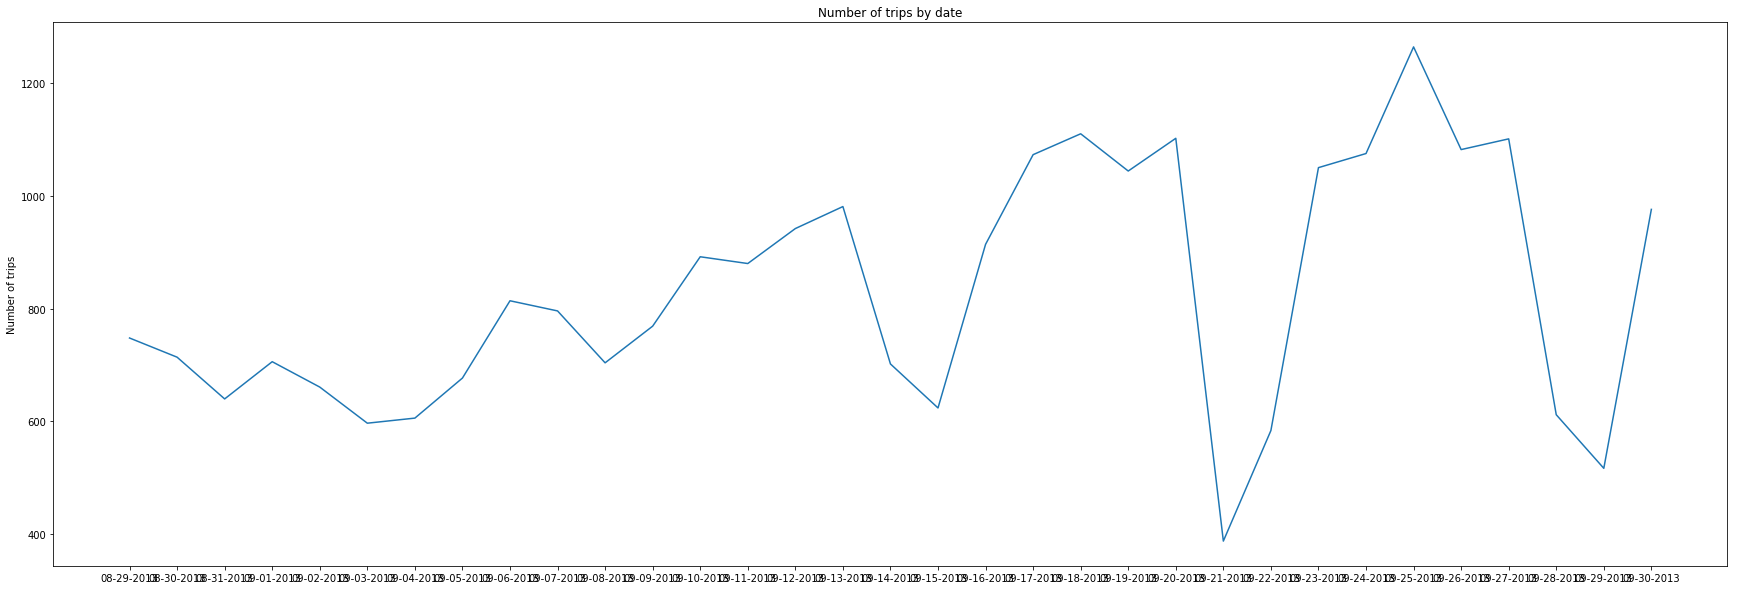

In [10]:
#use matplotlib to plot
plt.figure(figsize=(30,10))
plt.plot(eda_df.index, eda_df['trip_id'])
plt.title('Number of trips by date')
plt.ylabel('Number of trips')

plt.show()

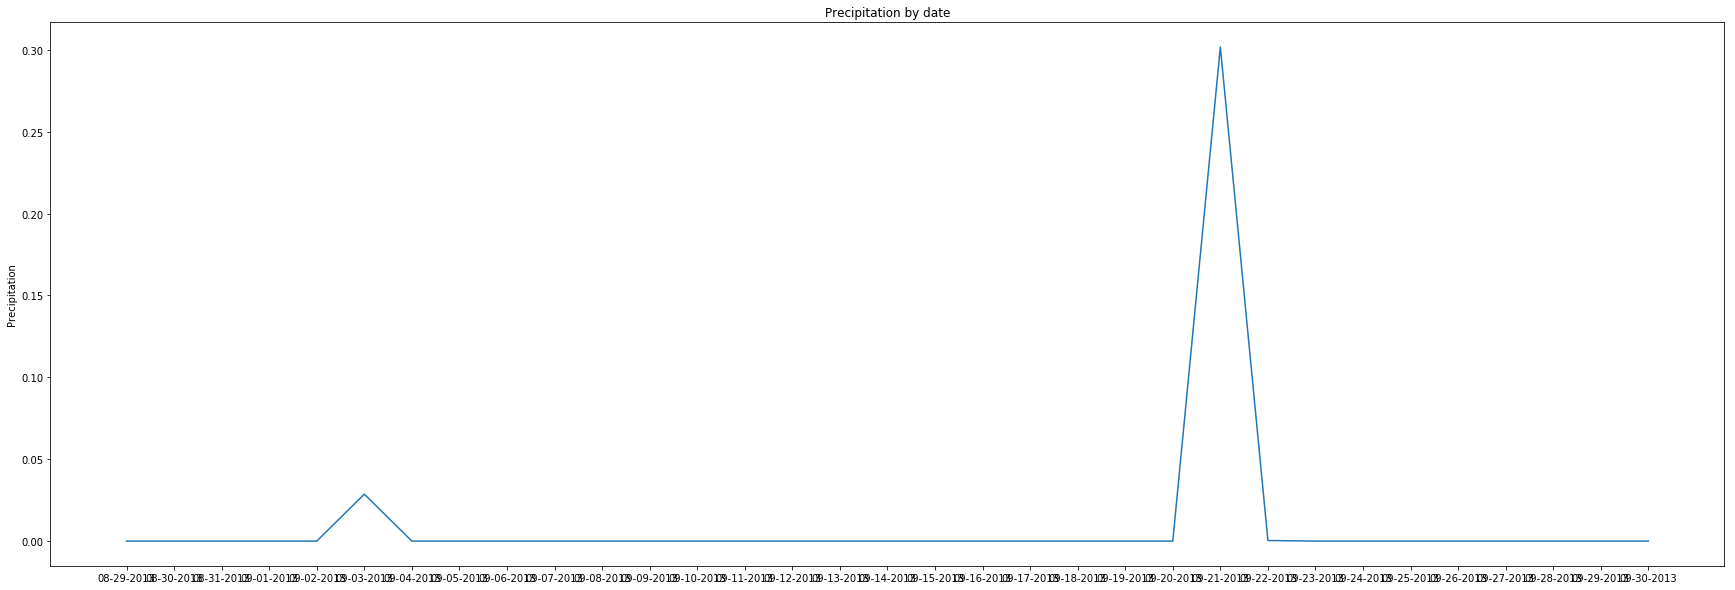

In [11]:
#use matplotlib to plot
plt.figure(figsize=(30,10))
plt.plot(eda_df.index, eda_df['precipitation'])
plt.title('Precipitation by date')
plt.ylabel('Precipitation')

plt.show()

,trip_id
subscription_type,
Customer,10649
Subscriber,16696


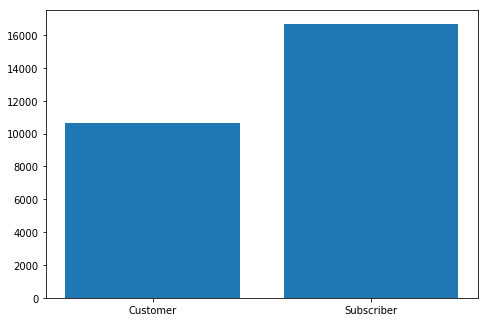

In [12]:
#plotting number of trips by subscription_type

eda_df2 = sample_data.groupby('subscription_type').agg({'trip_id': 'count'})

display(eda_df2)


fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

ax.bar(eda_df2.index, eda_df2['trip_id'])
plt.show()

## Data Output

In [13]:
trip_in = ['../01_Data/01_Raw_Data/201402_trip_data.csv',
           '../01_Data/01_Raw_Data/201408_trip_data.csv',
           '../01_Data/01_Raw_Data/201508_trip_data.csv' ]
station_data = ['../01_Data/01_Raw_Data/201402_station_data.csv',
                '../01_Data/01_Raw_Data/201408_station_data.csv',
                '../01_Data/01_Raw_Data/201508_station_data.csv' ]
weather_data = ['../01_Data/01_Raw_Data/201402_weather_data.csv',
                '../01_Data/01_Raw_Data/201408_weather_data.csv',
                '../01_Data/01_Raw_Data/201508_weather_data.csv']
trip_out = '../01_Data/03_Processed_Data/bike_share_summary.csv'

# This function will take in the station data and trip data and
# write out a new data file to the name listed above in trip_out.
summarise_data(trip_in, station_data, weather_data, trip_out)

In [14]:
trip_data = pd.read_csv('../01_Data/03_Processed_Data/bike_share_summary.csv')
display(trip_data.head())

,trip_id,duration,start_date,start_year,start_month,start_hour,weekday,start_terminal,lat,long,start_city,zip,end_city,subscription_type,precipitation
0,4576,1.050000,08-29-2013,2013,8,14,Thursday,South Van Ness at Market,37.774814,-122.418954,San Francisco,94127,San Francisco,Subscriber,0.0
1,4607,1.166667,08-29-2013,2013,8,14,Thursday,San Jose City Hall,37.337391,-121.886995,San Jose,95138,San Jose,Subscriber,0.0
2,4130,1.183333,08-29-2013,2013,8,10,Thursday,Mountain View City Hall,37.389218,-122.081896,Mountain View,97214,Mountain View,Subscriber,0.0
3,4251,1.283333,08-29-2013,2013,8,11,Thursday,San Jose City Hall,37.337391,-121.886995,San Jose,95060,San Jose,Subscriber,0.0
4,4299,1.383333,08-29-2013,2013,8,12,Thursday,South Van Ness at Market,37.774814,-122.418954,San Francisco,94103,San Francisco,Subscriber,0.0


## Bay Area Bike Shara Data Analysis Report

The following Tableau report was created based on the previous datasett. Embbeding the html code we are able to connect to Tableau Public and visualize the data.

In [15]:
%%HTML

<div class='tableauPlaceholder' id='viz1592913626055' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BayAreaBikeShare_15928350081600&#47;BayAreaBikeShare&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='BayAreaBikeShare_15928350081600&#47;BayAreaBikeShare' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Ba&#47;BayAreaBikeShare_15928350081600&#47;BayAreaBikeShare&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en-GB' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1592913626055');                    var vizElement = divElement.getElementsByTagName('object')[0];                    if ( divElement.offsetWidth > 800 ) { vizElement.style.width='1200px';vizElement.style.height='1827px';} else if ( divElement.offsetWidth > 500 ) { vizElement.style.width='1200px';vizElement.style.height='1827px';} else { vizElement.style.width='100%';vizElement.style.height='2577px';}                     var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>